# $$\framebox[3]{MATRIX INVERSE}$$

conditions for having an inverse:
- Square
- Full Rank

In [50]:
import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt

In [17]:
# size of square matrix
m = 3

#generate random matrix
A = np.random.randn(m,m)

#Compute its inverse
Ainv = np.linalg.inv(A)

#annd chech the multiplication
idm = A@Ainv

print(f'Matrix Inverse of A should be the identity matrix: \n {idm}')

Matrix Inverse of A should be the identity matrix: 
 [[ 1.00000000e+00  0.00000000e+00 -3.33066907e-16]
 [ 5.55111512e-17  1.00000000e+00 -2.77555756e-17]
 [ 1.66533454e-16 -1.11022302e-16  1.00000000e+00]]


If determinant = 0, it's not inversible

$$
\begin{bmatrix} 
a & b \\ 
c & d 
\end{bmatrix}
=>
\begin{bmatrix} 
d & b \\ 
c & a 
\end{bmatrix}
=>
\begin{bmatrix} 
d & -b \\ 
-c & a 
\end{bmatrix}
=>
\begin{bmatrix} 
d/det & -b/det \\ 
-c/det & a/det 
\end{bmatrix}
$$


### MCA ALGORITHM

- M: The minoirs matrix: a matrix of determinants
- C: The cofactors matrix: the minors matrix Hadamard-multiplied by a grid od alternating pluses and minuses
- A-1: The adjugate matrix: the transpose os the cofactors matrix, divided by the determinant

## Challenge

In [25]:
#MCA algorithm in code

m = 4
A = np.random.randn(m,m)

print(f"Matrix A: \n {A}"), print(" ")

# Minors Matrix
minors = np.zeros((m,m))
H = np.zeros((m,m))
print(f"Matrix Minors : \n {minors}"), print(" ")

for i in range(m):
    for j in range(m):

        #select rows and columns
        rows = [True]*m
        rows[i] = False

        cols = [True]*m
        cols[j] = False

        #compute the minors matrix
        minors[i,j] = np.linalg.det(A[rows,:][:,cols])

        #Compute H matrix
        H[i,j] = (-1)**(i+j)

print(f"Matrix H : \n {H}"), print(" ")

## cofactor Matrix
C = H*minors

print(f"Matrix C : \n {C}"), print(" ")

## Adjugate matrix
Ainv = C.T/np.linalg.det(A)

print(f"Matrix Ainv : \n {Ainv}"), print(" ")

print(f"Matrix A@Ainv : \n {A@Ainv}"), print(" ")

Matrix A: 
 [[-0.12380385  0.82931705  0.212871    2.2974142 ]
 [-0.52650121  0.18723107 -0.48409478 -1.0284511 ]
 [-0.43960651 -1.5677057  -2.09364645 -0.35203144]
 [-1.34821533  0.42869166  0.47615072 -0.84595615]]
 
Matrix Minors : 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
 
Matrix H : 
 [[ 1. -1.  1. -1.]
 [-1.  1. -1.  1.]
 [ 1. -1.  1. -1.]
 [-1.  1. -1.  1.]]
 
Matrix C : 
 [[ 0.92269995 -2.04778394  1.60908307 -1.60256538]
 [-1.64046219 -7.18392943  5.38646733  2.00574931]
 [ 1.36719451  1.98636511  0.80694883 -0.71812846]
 [ 3.93124826  2.34580629 -2.51438484 -0.40196229]]
 
Matrix Ainv : 
 [[-0.17910504  0.31842967 -0.26538576 -0.76309354]
 [ 0.39749479  1.3944706  -0.38557279 -0.45534383]
 [-0.31233868 -1.04556572 -0.15663662  0.48806656]
 [ 0.31107353 -0.38933546  0.13939572  0.07802479]]
 
Matrix A@Ainv : 
 [[ 1.00000000e+00  3.33066907e-16 -3.46944695e-17  2.77555756e-17]
 [ 2.77555756e-17  1.00000000e+00  0.00000000e+00  2.77555756e-17]
 [-1.11022302

(None, None)

### Computing the Inverse via row reduction

In [136]:
#matrix size
m = 4


# Random integers matrix
A = Matrix(np.round(10 * np.random.randn(m, m)).astype(int))
print(f'Matrix A: \n {A}'), print(" ")

#argument A and identity
Aaug = Matrix(np.concatenate((A, np.eye(m,m)), axis=1)) #Concatenate matrix A and Identity
print('Size of Aaug: \n', Aaug.shape)
print(f'Matrix Aaug: \n {Aaug}'), print(" ")

#rref row recude echelon form
Asol = Aaug.rref()
Asol = Asol[0]
Ainvrref = Asol[:,m:m*2]
Ainv = A.inv()

Matrix A: 
 Matrix([[-18, -12, -17, -22], [-18, -10, 9, 4], [1, -6, 3, -5], [-5, -7, 8, -3]])
 
Size of Aaug: 
 (4, 8)
Matrix Aaug: 
 Matrix([[-18, -12, -17, -22, 1.00000000000000, 0.0, 0.0, 0.0], [-18, -10, 9, 4, 0.0, 1.00000000000000, 0.0, 0.0], [1, -6, 3, -5, 0.0, 0.0, 1.00000000000000, 0.0], [-5, -7, 8, -3, 0.0, 0.0, 0.0, 1.00000000000000]])
 


(Text(0.5, 1.0, 'A|I'), (-0.5, 7.5, 3.5, -0.5))

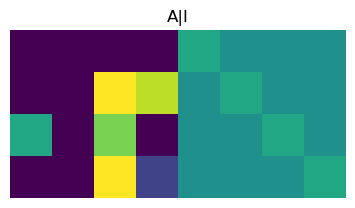

In [138]:
# Convertendo para um array numpy
Aaug_np = np.array(Aaug).astype(float)

#show the augemented matrices
plt.subplot(212)
plt.imshow(Aaug_np, vmin=-5, vmax = 5) #vmin and vmax calibrates the color
plt.title("A|I"), plt.axis('off')


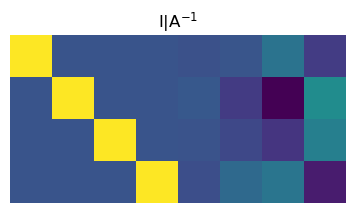

In [140]:
Asol_np = np.array(Asol).astype(float)

plt.subplot(212)
plt.imshow(Asol_np)
plt.title("I|A$^{-1}$"), plt.axis('off')

plt.show()

(Text(0.5, 1.0, 'A$^{-1}$ from inv()'), (-0.5, 3.5, 3.5, -0.5))

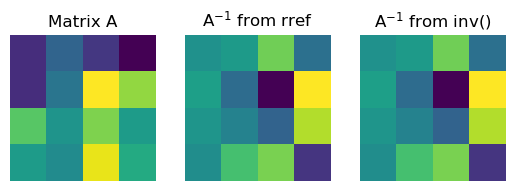

In [142]:
A_np = np.array(A).astype(float)
Ainvrref_np = np.array(Ainvrref).astype(float)
Ainv_np = np.array(Ainv).astype(float)
#show the square matrices
plt.subplot(131)
plt.imshow(A_np)
plt.title('Matrix A'), plt.axis('off')

plt.subplot(132)
plt.imshow(Ainvrref_np)
plt.title('A$^{-1}$ from rref'), plt.axis('off')

plt.subplot(133)
plt.imshow(Ainv_np)
plt.title('A$^{-1}$ from inv()'), plt.axis('off')

## Challenge

In [163]:
#Diagonal matrices and their inverses

#Create some diagonal matrices. start with 2x2 integers, work up to larger matrices
m = 2

A = Matrix(np.round(10 * np.random.randn(m, m)).astype(int))
print(f'Matrix A: \n {A}'), print(" ")

#compute their inverses (condition on the diagonal matrix for invertibility)

# Convertendo para numpy array
A_np = np.array(A).astype(float)

# Calculando a inversa
Ainv = np.linalg.inv(A_np)

print(f'Matrix inverse of A: \n {Ainv}'), print(" ")
#think



Matrix A: 
 Matrix([[-6, 14], [-9, -16]])
 
Matrix inverse of A: 
 [[-0.07207207 -0.06306306]
 [ 0.04054054 -0.02702703]]
 


(None, None)

In [173]:
#Diagonal matrices and their inverses

#Create some diagonal matrices. start with 2x2 integers, work up to larger matrices
m = 2

A = np.array([[2, 0], [0, 3]])
print(f'Matrix A: \n {A}'), print(" ")

B = np.diag(np.arange(1,6))
print(f'Matrix B: \n {B}'), print(" ")
#compute their inverses (condition on the diagonal matrix for invertibility)

# Calculando a inversa
Ainv = np.linalg.inv(A)

print(f'Matrix inverse of A: \n {Ainv}'), print(" ")

Binv = np.linalg.inv(B)

print(f'Matrix inverse of B: \n {Binv}'), print(" ")
#think


Matrix A: 
 [[2 0]
 [0 3]]
 
Matrix B: 
 [[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]
 
Matrix inverse of A: 
 [[0.5        0.        ]
 [0.         0.33333333]]
 
Matrix inverse of B: 
 [[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]
 


(None, None)

## Left Inverse

## $$ (|A^TA)^{-1}A^T|A = I $$




## Right Inverse

## $$ A|A^T(AA^T)^{-1}|= I $$


In [214]:
# m>n for left inverse
# m<n for right inverse

In [228]:
m = 6
n = 3

#Create matrices
A = np.random.randn(m,n)
AtA = A.T@A
AAt = A@A.T

print(f'Matrix A: \n {A}'), print(" ")
print(f'Matrix AtA: \n {AtA}'), print(" ")
print(f'Matrix AAt: \n {AAt}'), print(" ")

#Print inspect ranks
print('Shape of A^TA: \n', np.shape(AtA))
print('Rank of A^TA: \n', np.linalg.matrix_rank(AtA))
print('Shape of AA^T: \n', np.shape(AAt))
print('Rank of AA^T: \n', np.linalg.matrix_rank(AAt))

Matrix A: 
 [[ 1.25681171 -0.30830099 -3.11838064]
 [-0.12145732  0.2402517   0.19694976]
 [ 0.44090669 -1.52625968  0.92054524]
 [ 1.18680229  0.46828829 -1.42726484]
 [-1.54912974 -0.53513314 -0.95058   ]
 [-1.9654044  -2.22135638  0.76263701]]
 
Matrix AtA: 
 [[ 9.45984336  4.66102515 -5.25746332]
 [ 4.66102515  7.92232455 -2.25004688]
 [-5.25746332 -2.25004688 14.132793  ]]
 
Matrix AAt: 
 [[11.39892297 -0.84088313 -1.84592638  5.79796832  1.18228792 -4.16348939]
 [-0.84088313  0.11126197 -0.23893666 -0.31273824 -0.12763    -0.14477071]
 [-1.84592638 -0.23893666  3.37127085 -1.50532231 -0.74132143  3.22584859]
 [ 5.79796832 -0.31273824 -1.50532231  3.66487853 -0.7323779  -4.46126662]
 [ 1.18228792 -0.12763    -0.74132143 -0.7323779   3.58977276  3.50844034]
 [-4.16348939 -0.14477071  3.22584859 -4.46126662  3.50844034  9.37885384]]
 
Shape of A^TA: 
 (3, 3)
Rank of A^TA: 
 3
Shape of AA^T: 
 (6, 6)
Rank of AA^T: 
 3


In [233]:
#Left Inverse
Aleft = np.linalg.inv(AtA)@A.T

#Right Inverse
Aright = A.T@np.linalg.inv(AAt)


print(f'Matrix Left Inverse: \n {Aleft}'), print(" ")
print(f'Matrix Right Inverse: \n {Aright}'), print(" ")

Matrix Left Inverse: 
 [[ 0.09040079 -0.0332986   0.26582283  0.09585416 -0.27925899 -0.11130913]
 [-0.15209516  0.05274142 -0.31678689 -0.01659008  0.05042412 -0.22134728]
 [-0.21123376  0.00994525  0.11358786 -0.06797266 -0.16311831 -0.02268543]]
 
Matrix Right Inverse: 
 [[ 0.25    -1.      -0.125    0.5     -0.75     0.     ]
 [-0.5      1.       0.125    0.       0.25    -0.125  ]
 [-0.75     2.25     0.1875  -0.375    0.       0.09375]]
 


(None, None)

In [235]:
#now test
i_left = Aleft@A
i_right = A@Aright

print(f'I Left Inverse: \n {i_left}'), print(" ")
print(f'I Right Inverse: \n {i_right}'), print(" ")

I Left Inverse: 
 [[ 1.00000000e+00 -2.22044605e-16  3.05311332e-16]
 [-5.55111512e-17  1.00000000e+00 -1.66533454e-16]
 [ 7.63278329e-17 -9.71445147e-17  1.00000000e+00]]
 
I Right Inverse: 
 [[ 2.8071389  -8.58146913 -0.78033546  1.79779859 -1.01968403 -0.25381056]
 [-0.2982025   0.80484598  0.08214171 -0.13458482  0.15115592 -0.01156742]
 [ 0.18294758  0.10406041 -0.07329356 -0.12475112 -0.71224494  0.27708358]
 [ 1.13300506 -3.9298599  -0.35742641  1.12862546 -0.77302965 -0.19234212]
 [ 0.59321913 -1.12480839 -0.05148417 -0.41809737  1.02806402 -0.02222523]
 [ 0.04734933  1.45998129  0.11100044 -1.26869108  0.91871421  0.34916677]]
 


(None, None)

In [237]:
#and then test using the inverse function
AtA_inv = np.linalg.inv(AtA)
I_AtA = AtA_inv @ AtA

AAt_inv = np.linalg.inv(AAt)
I_AAt = AAt_inv @ AAt

print(f'I Left Inverse: \n {I_AtA}'), print(" ")
print(f'I Right Inverse: \n {I_AAt}'), print(" ")

I Left Inverse: 
 [[ 1.00000000e+00 -1.11022302e-16  1.11022302e-16]
 [ 1.28369537e-16  1.00000000e+00 -5.55111512e-17]
 [-5.55111512e-17 -2.77555756e-17  1.00000000e+00]]
 
I Right Inverse: 
 [[ 4.62500000e+00 -6.30859375e-01  1.12500000e+00 -2.50000000e-01
   3.68750000e+00  4.37500000e+00]
 [-1.45000000e+01 -3.25000000e+00  1.92500000e+01 -1.60000000e+01
   2.87500000e+01  4.70000000e+01]
 [-2.75000000e+00 -1.32812500e-01  1.75000000e+00 -1.75000000e+00
   2.25000000e+00  4.00000000e+00]
 [-4.06250000e+00  4.55078125e-01 -9.37500000e-01 -1.00000000e+00
  -1.87500000e+00 -1.62500000e+00]
 [-5.00000000e-01  6.25000000e-02  2.50000000e-01 -5.00000000e-01
   5.00000000e-01  0.00000000e+00]
 [ 0.00000000e+00  4.68750000e-02  0.00000000e+00 -5.00000000e-01
   5.00000000e-01  1.00000000e+00]]
 


(None, None)

Text(0.5, 1.0, '$A^T(AA^T)^{-1}$')

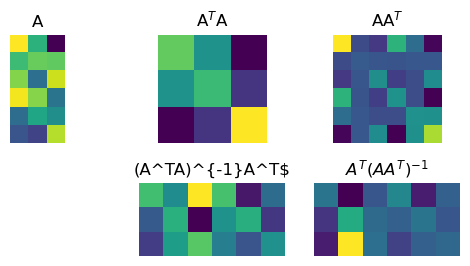

In [241]:
## show images plt.subplot(331) plt.imshow(A), plt.axis('off') plt.title('A') 
plt.subplot(331) 
plt.imshow(A), plt.axis('off') 
plt.title('A') 


plt.subplot(332) 
plt.imshow(AtA), plt.axis('off') 
plt.title('A$^T$A') 
          
plt.subplot(333) 
plt.imshow(AAt), plt.axis('off') 
plt.title('AA$^T$')
          
plt.subplot(335) 
plt.imshow(Aleft), plt.axis('off') 
plt.title( '(A^TA)^{-1}A^T$') 
          
plt.subplot(336) 
plt.imshow(Aright), plt.axis('off') 
plt.title( '$A^T(AA^T)^{-1}$') 

## Proof: The inverse is unique

#### Proof 1
## $$ A^{-1}AB = A^{-1}I \to B = A^{-1}$$
## $$ A^{-1}AC = A^{-1}I \to C = A^{-1}$$
## $$ B=  C $$

#### Proof 2
## $$ C = CI = CAB = IB = B $$

## Pseudoinverse

Matrix A: 
 [[ 1.25681171 -0.30830099 -3.11838064]
 [-0.12145732  0.2402517   0.19694976]
 [ 0.44090669 -1.52625968  0.92054524]
 [ 1.18680229  0.46828829 -1.42726484]
 [-1.54912974 -0.53513314 -0.95058   ]
 [-1.9654044  -2.22135638  0.76263701]]
 
Pseudoinverse Matrix A: 
 [[ 0.09040079 -0.0332986   0.26582283  0.09585416 -0.27925899 -0.11130913]
 [-0.15209516  0.05274142 -0.31678689 -0.01659008  0.05042412 -0.22134728]
 [-0.21123376  0.00994525  0.11358786 -0.06797266 -0.16311831 -0.02268543]]
 


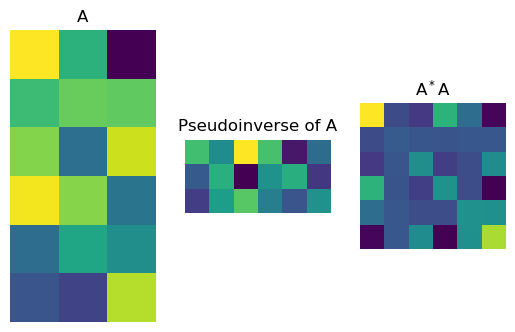

In [257]:
#Pseudoinverse of rectangular matrix A
print(f'Matrix A: \n {A}'), print(" ")

pseudoInvA = np.linalg.pinv(A)
print(f'Pseudoinverse Matrix A: \n {pseudoInvA}'), print(" ")

plt.subplot(131) 
plt.imshow(A), plt.axis('off') 
plt.title('A') 


plt.subplot(132) 
plt.imshow(pseudoInvA), plt.axis('off') 
plt.title('Pseudoinverse of A') 
          
plt.subplot(133) 
plt.imshow(AAt), plt.axis('off') 
plt.title('A$^*$A')
          
plt.show()


In [259]:
#create random matrix
n = 50
A = np.random.randn(n,n)

#make rank deficient by repeating a column
A[:,n-1] = A[:, n-2]

#rank of A!
print(f'rank = {np.linalg.matrix_rank(A)}')

rank = 49


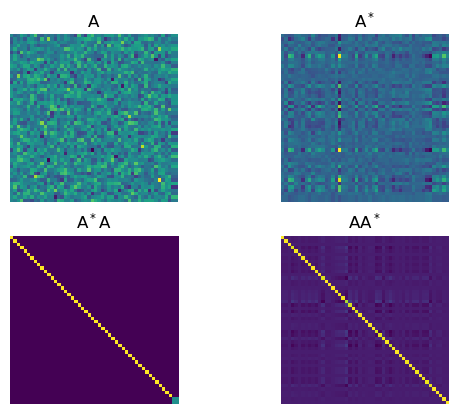

In [280]:
#compute the pseudoinverse
Ai = np.linalg.pinv(A)

#and show the matrices
plt.subplot(221)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(222)
plt.imshow(Ai), plt.axis('off')
plt.title('A$^*$')

plt.subplot(223)
plt.imshow(Ai@A), plt.axis('off')
plt.title('A$^*$A')

plt.subplot(224)
plt.imshow(A@Ai), plt.axis('off')
plt.title('AA$^*$')

plt.show()

## Challenge

In [293]:
#Pseudoinverse is the same as the "real" inverse for an invertible matrix?

m = 5
A = np.random.randn(m,m)

AinvF = np.linalg.inv(A)
AinvP = np.linalg.pinv(A)

print(f'Matrix A: \n {np.round(A,3)}'), print(" ")
print(f'Inverse of A: \n {np.round(AinvF,3)}'), print(" ")
print(f'Pseudoinverse of A: \n {np.round(AinvP,3)}'), print(" ")

print(np.round(AinvP-AinvF,5))

#they a

Matrix A: 
 [[-0.541 -0.137  2.036 -0.789 -1.048]
 [ 1.132  0.891 -0.044  0.922  0.849]
 [-2.738 -0.622  0.18  -0.659 -1.111]
 [ 1.002  0.323 -1.168 -0.042  0.164]
 [-0.692  0.664 -0.751 -0.685  1.541]]
 
Inverse of A: 
 [[ 0.102 -0.261 -0.401  0.188 -0.095]
 [ 0.625  1.224  0.726  1.052  0.162]
 [ 0.234  0.042 -0.221 -0.504  0.03 ]
 [-0.438  0.567  0.236 -0.501 -0.387]
 [-0.304 -0.372 -0.495 -0.836  0.379]]
 
Pseudoinverse of A: 
 [[ 0.102 -0.261 -0.401  0.188 -0.095]
 [ 0.625  1.224  0.726  1.052  0.162]
 [ 0.234  0.042 -0.221 -0.504  0.03 ]
 [-0.438  0.567  0.236 -0.501 -0.387]
 [-0.304 -0.372 -0.495 -0.836  0.379]]
 
[[-0. -0.  0.  0. -0.]
 [ 0. -0. -0.  0. -0.]
 [-0. -0.  0.  0. -0.]
 [-0. -0.  0.  0. -0.]
 [ 0.  0.  0. -0.  0.]]
